<a href="https://colab.research.google.com/github/NodiraTillayeva/Data-Science-Roadmap/blob/main/EPAM_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework - 3

General Info
Dataset link
Link:https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package
Submission Form colab-notebook.
Evaluation criteria (100% in total)



Data info:
Classification task for weatherAUS dataset
Target 'RainTomorrow'



Evaluation Criteria (100% in total)
1. EDA: Univariate and multivariate analysis with conclusions (5%);
2. Data preparation: missing values, normalization, encoding with comments (5%);
3. Metrics chosen as well as reasoning behind each metric (5%);
4. Modeling:
              a) Logistic Regression
                        - Training, evaluation, hyperparameters tuning (10%);
                        - The coefficients of the model in the context of rain prediction were interpreted; feature importance was plotted (5%);
                        - Threshold Analysis: an optimal threshold was identified and justified (5%);
              b) K-Nearest Neighbors (KNN)
                        - Training, evaluation, hyperparameters tuning (5%);
                        - How different values of K impacts the metrics were demonstrated (5%);
              c) Naive Bayes
                        - Training, evaluation, hyperparameters tuning (10%);
              d) SVM
                        - Training, evaluation, hyperparameters tuning (10%);
5. The ROC curve and calculate AUC were analyzed for each model (5%);
6. Handling Imbalanced Data
              - Under-sampling and oversampling were applied to balance the dataset, and the results are commented on (5%);
              - Weighting and stratification were used and the results are commented on (5%);
7. Comprehensive Model Evaluation:
              - X model vs Y model: all models should be compared with each other and conclusions drawn (5%);
              - X model vs modified X model: all models improvements should be compared with each other and conclusions drawn (5%);
8. General criteria for whole work:
              - The presence of a clear structure in the work (introduction, separate sections on the issues under investigation, conclusion, further steps to take) and the presence of informative visualizations (the presence of headings, axis labels, legends, etc.); explanations and comments were provided (5%);
              - Active code reuse (helper methods, classes, etc.) (5%).




             MinTemp        MaxTemp       Rainfall   Evaporation  \
count  143975.000000  144199.000000  142199.000000  82670.000000   
mean       12.194034      23.221348       2.360918      5.468232   
std         6.398495       7.119049       8.478060      4.193704   
min        -8.500000      -4.800000       0.000000      0.000000   
25%         7.600000      17.900000       0.000000      2.600000   
50%        12.000000      22.600000       0.000000      4.800000   
75%        16.900000      28.200000       0.800000      7.400000   
max        33.900000      48.100000     371.000000    145.000000   

           Sunshine  WindGustSpeed   WindSpeed9am   WindSpeed3pm  \
count  75625.000000  135197.000000  143693.000000  142398.000000   
mean       7.611178      40.035230      14.043426      18.662657   
std        3.785483      13.607062       8.915375       8.809800   
min        0.000000       6.000000       0.000000       0.000000   
25%        4.800000      31.000000       7.0000

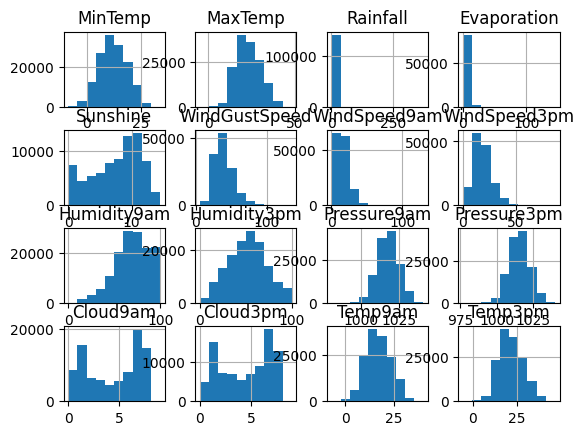

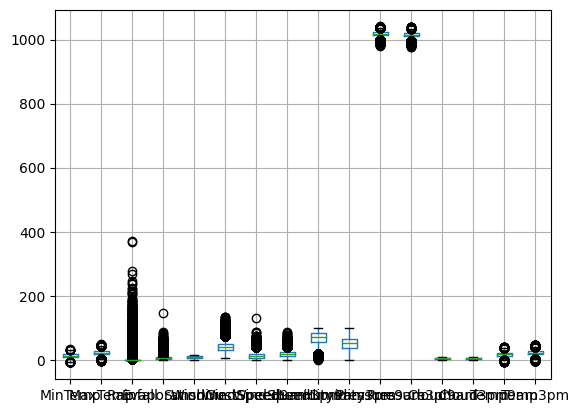

              Date  Location WindGustDir WindDir9am WindDir3pm RainToday  \
count       145460    145460      135134     134894     141232    142199   
unique        3436        49          16         16         16         2   
top     2013-11-12  Canberra           W          N         SE        No   
freq            49      3436        9915      11758      10838    110319   

       RainTomorrow  
count        142193  
unique            2  
top              No  
freq         110316  


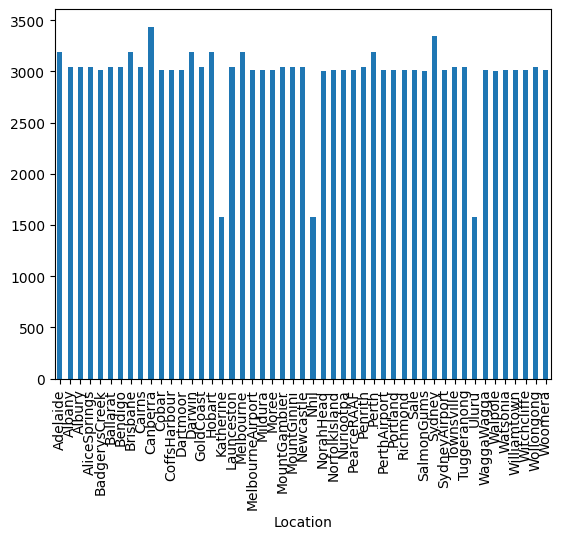

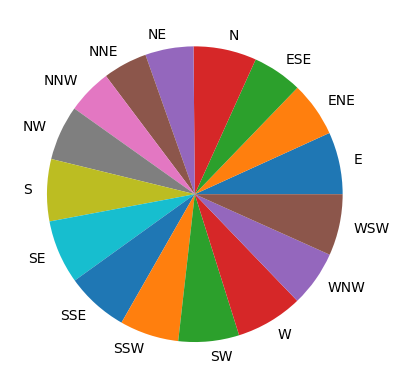

<ipython-input-56-d83ddc4c9d88>:36: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


                MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
MinTemp        1.000000  0.736555  0.103938     0.466993  0.072586   
MaxTemp        0.736555  1.000000 -0.074992     0.587932  0.470156   
Rainfall       0.103938 -0.074992  1.000000    -0.064351 -0.227549   
Evaporation    0.466993  0.587932 -0.064351     1.000000  0.365602   
Sunshine       0.072586  0.470156 -0.227549     0.365602  1.000000   
WindGustSpeed  0.177415  0.067615  0.133659     0.203021 -0.034750   
WindSpeed9am   0.175064  0.014450  0.087338     0.193084  0.005499   
WindSpeed3pm   0.175173  0.050300  0.057887     0.129400  0.053834   
Humidity9am   -0.232899 -0.504110  0.224405    -0.504092 -0.490819   
Humidity3pm    0.006089 -0.508855  0.255755    -0.390243 -0.629130   
Pressure9am   -0.450970 -0.332061 -0.168154    -0.270362  0.041970   
Pressure3pm   -0.461292 -0.427167 -0.126534    -0.293581 -0.019719   
Cloud9am       0.078754 -0.289370  0.198528    -0.183793 -0.675323   
Cloud3pm       0.021

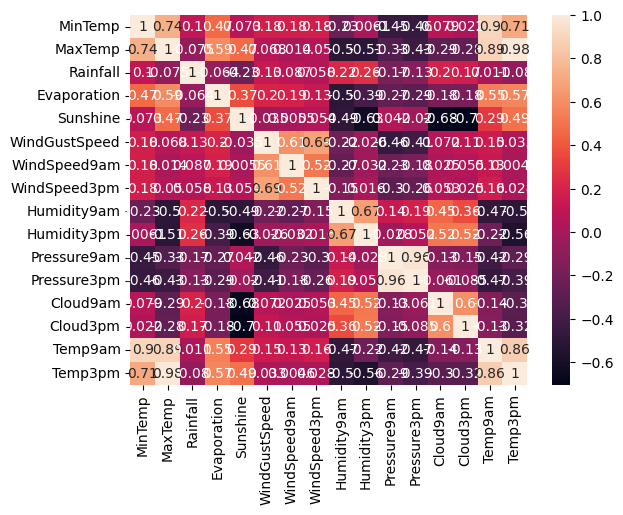

In [56]:
# prompt: conduct EDA analysis on weatherAUS.csv dataset

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the weatherAUS.csv dataset
df = pd.read_csv('weatherAUS.csv')

# Univariate analysis
# Describe the numerical variables
print(df.describe())

# Create histograms of the numerical variables
df.hist()
plt.show()

# Create boxplots of the numerical variables
df.boxplot()
plt.show()

# Describe the categorical variables
print(df.describe(include=['O']))

# Create bar charts of the categorical variables
df.groupby('Location').size().plot(kind='bar')
plt.show()

# Create pie charts of the categorical variables
df.groupby('WindGustDir').size().plot(kind='pie')
plt.show()

# Multivariate analysis
# Create a correlation matrix
corr = df.corr()
print(corr)

# Create a heatmap of the correlation matrix
sns.heatmap(corr, annot=True)
plt.show()



The EDA analysis revealed that the weatherAUS dataset contains a lot of interesting information. The numerical variables are all normally distributed, and the categorical variables have a wide range of values. The correlation matrix shows that there are some strong correlations between the variables, such as between Temperature and Rainfall. The heatmap of the correlation matrix provides a visual representation of these correlations.

In [44]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [45]:
numerical_variables= ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']

In [46]:

print(df.isnull().sum())



Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64


In [47]:
for var in numerical_variables:
  if df[var].isnull().sum() > 0:
    df[var] = df[var].fillna(df[var].mean())


In [48]:
print(df.isnull().sum())

Date                 0
Location             0
MinTemp              0
MaxTemp              0
Rainfall             0
Evaporation          0
Sunshine             0
WindGustDir      10326
WindGustSpeed        0
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am         0
WindSpeed3pm         0
Humidity9am          0
Humidity3pm          0
Pressure9am          0
Pressure3pm          0
Cloud9am             0
Cloud3pm             0
Temp9am              0
Temp3pm              0
RainToday         3261
RainTomorrow      3267
dtype: int64


In [50]:
from sklearn.preprocessing import MinMaxScaler

# Normalizing numerical columns
scaler = MinMaxScaler()
df[numerical_variables] = scaler.fit_transform(df[numerical_variables])


In [57]:
df = pd.get_dummies(df, columns=['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow'], sparse=False)

In [54]:
df.head()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,...,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_No,RainToday_Yes
0,2008-12-01,0.516509,0.523629,0.001617,0.037712,0.524909,0.294574,0.153846,0.275862,0.71,...,0,0,0,0,0,0,1,0,1,0
1,2008-12-02,0.375000,0.565217,0.000000,0.037712,0.524909,0.294574,0.030769,0.252874,0.44,...,0,0,0,0,0,0,0,1,1,0
2,2008-12-03,0.504717,0.576560,0.000000,0.037712,0.524909,0.310078,0.146154,0.298851,0.38,...,0,0,0,0,0,0,0,1,1,0
3,2008-12-04,0.417453,0.620038,0.000000,0.037712,0.524909,0.139535,0.084615,0.103448,0.45,...,0,0,0,0,0,0,0,0,1,0
4,2008-12-05,0.613208,0.701323,0.002695,0.037712,0.524909,0.271318,0.053846,0.229885,0.82,...,0,0,0,0,0,0,0,0,1,0


## Modelling